In [1]:
#import necessary libraries for the execution of the project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# 2a Importing - import data from a flat file (csv) and create a dataframe - project dataset
uci_bike_rentals = pd.read_csv('uci_bike_rentals.csv')

In [3]:
#2b Sample data set from Dublin Bikes - Demonstrate importing data using API - Step 1 Successfully connect to website using GET request
import requests

dublin_bikes = requests.get('https://www.dublinbikes.ie/en/home')
print(dublin_bikes.status_code)

200


In [96]:
#2b - Importing data using API - Step 1 Read data from JSON
import requests
dublin_bikes = requests.get('https://data.smartdublin.ie/dublinbikes-openapi.json')
json_data = dublin_bikes.json()
print(json_data.keys())
for k in json_data.keys():
    print(k + ': ', json_data[k])

dict_keys(['openapi', 'servers', 'info', 'paths', 'components', 'tags'])
openapi:  3.0.2
servers:  [{'url': 'https://data.smartdublin.ie/dublinbikes-api'}]
info:  {'title': 'SmartDublin Dublinbikes API', 'description': "This is the API associated with [SmartDublin's Dublinbikes Api dataset](https://data.smartdublin.ie/dataset/dublinbikes-api). Dublinbikes is a bike share scheme in operation in Dublin City. Bicycles may be rented from and returned to designated cycle stations. There are also rollups of historic bike stations data (30 minutes granularity) available as downloadable CSV resources.", 'version': '0.1.0'}
paths:  {'/last_snapshot/': {'get': {'tags': ['Last Snapshot'], 'summary': 'Last Snapshot', 'description': 'Fetch the last status for every Dublinbikes Station\n\nFields:\n\n- **id**: Unique record id\n- **harvest_time**: Data retrieval timestamp\n- **station_id**: Unique station id\n- **available_bike_stands**: Available bike stands\n- **bike_stands**: Total bike stands\n- 

In [5]:
#2b - Extract a sample key (tags)
json_data['tags']


[{'name': 'Last Snapshot',
  'description': 'Fetch the last status for every Dublinbikes Station'},
 {'name': 'Historical records',
  'description': 'Fetch a 1 hour historical report of every Dublinbikes Station (5 minutes granularity)'}]

In [6]:
#2b - Create a list of dictionaries variable and convert it into dataframe
tags_dict = [{'name': 'Last Snapshot',
  'description': 'Fetch the last status for every Dublinbikes Station'},
 {'name': 'Historical records',
  'description': 'Fetch a 1 hour historical report of every Dublinbikes Station (5 minutes granularity)'}]
bike_station = pd.DataFrame(tags_dict)
print(bike_station)

                 name                                        description
0       Last Snapshot  Fetch the last status for every Dublinbikes St...
1  Historical records  Fetch a 1 hour historical report of every Dubl...


In [7]:
# UCI Bike Rental dataset - Understand data sample using df.head()
uci_bike_rentals.head(5)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,3,0,0,2,23.78,27.275,73,11.0014,133
1,4,2011,8,3,0,0,1,27.88,31.820,57,0.0000,132
2,5,2012,2,1,0,1,1,20.50,24.240,59,0.0000,19
3,7,2011,20,3,0,1,3,25.42,28.790,83,19.9995,58
4,8,2011,17,3,0,1,3,26.24,28.790,89,0.0000,285


In [8]:
# UCI Bike Rental dataset - Understand data sample using df.tail()
uci_bike_rentals.tail(5)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
7684,10882,2012,18,1,0,1,1,13.94,15.150,42,22.0028,457
7685,10883,2012,3,1,0,1,1,9.02,11.365,51,11.0014,1
7686,10884,2012,15,2,0,0,1,21.32,25.000,19,27.9993,626
7687,10885,2011,19,4,0,1,1,12.30,14.395,45,15.0013,217
7688,10886,2012,21,3,0,1,1,30.34,34.850,66,7.0015,381


In [9]:
# Understand the size of the dataset - rows and columns, data type
uci_bike_rentals.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7689 entries, 0 to 7688
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          7689 non-null   int64  
 1   year        7689 non-null   int64  
 2   hour        7689 non-null   int64  
 3   season      7689 non-null   int64  
 4   holiday     7689 non-null   int64  
 5   workingday  7689 non-null   int64  
 6   weather     7689 non-null   int64  
 7   temp        7689 non-null   float64
 8   atemp       7689 non-null   float64
 9   humidity    7689 non-null   int64  
 10  windspeed   7689 non-null   float64
 11  count       7689 non-null   int64  
dtypes: float64(3), int64(9)
memory usage: 721.0 KB


In [10]:
# Check dataset for null values - observed no null values
uci_bike_rentals.isnull().any()

id            False
year          False
hour          False
season        False
holiday       False
workingday    False
weather       False
temp          False
atemp         False
humidity      False
windspeed     False
count         False
dtype: bool

In [11]:
# Drop duplicates - observed no duplicates
drop_duplicates = uci_bike_rentals.drop_duplicates()
print(uci_bike_rentals.shape, drop_duplicates.shape)

(7689, 12) (7689, 12)


In [12]:
# Demonstrate 'Remove duplicate rows' 
# Create a copy of the original dataframe, 
# Create new row as a dictionary and append
uci_bike_rentals1 = uci_bike_rentals.copy()
new_row = {'id':10886, 'year':2012, 'hour':21, 'season':3, 'holiday':0, 'workingday':1, 'weather':1, 'temp': 30.34, 'atemp':34.850, 'humidity':66, 'windspeed': 7.0015, 'count':381}
uci_bike_rentals1 = uci_bike_rentals.append(new_row, ignore_index = True)
print(uci_bike_rentals1)

           id    year  hour  season  holiday  workingday  weather   temp  \
0         3.0  2012.0  23.0     3.0      0.0         0.0      2.0  23.78   
1         4.0  2011.0   8.0     3.0      0.0         0.0      1.0  27.88   
2         5.0  2012.0   2.0     1.0      0.0         1.0      1.0  20.50   
3         7.0  2011.0  20.0     3.0      0.0         1.0      3.0  25.42   
4         8.0  2011.0  17.0     3.0      0.0         1.0      3.0  26.24   
...       ...     ...   ...     ...      ...         ...      ...    ...   
7685  10883.0  2012.0   3.0     1.0      0.0         1.0      1.0   9.02   
7686  10884.0  2012.0  15.0     2.0      0.0         0.0      1.0  21.32   
7687  10885.0  2011.0  19.0     4.0      0.0         1.0      1.0  12.30   
7688  10886.0  2012.0  21.0     3.0      0.0         1.0      1.0  30.34   
7689  10886.0  2012.0  21.0     3.0      0.0         1.0      1.0  30.34   

       atemp  humidity  windspeed  count  
0     27.275      73.0    11.0014  133.0  
1

In [18]:
# Remove duplicates - found 1 duplicate (oiginal number of rows is 7689)
drop_duplicates = uci_bike_rentals1.drop_duplicates()
print(uci_bike_rentals1.shape, drop_duplicates.shape)

(7689, 12) (7689, 12)


In [19]:
# Demonstrate Merge data 
# Step 1 - slice original dataset dataframe using .iloc indexing to only show the first 10 rows/and columns that exclude weather attributes
# Create new dataframe from above - year_bike
year_bike = uci_bike_rentals.iloc[0:10,0:6]
year_bike1 = pd.DataFrame(year_bike)
print(year_bike1)

   id  year  hour  season  holiday  workingday
0   3  2012    23       3        0           0
1   4  2011     8       3        0           0
2   5  2012     2       1        0           1
3   7  2011    20       3        0           1
4   8  2011    17       3        0           1
5   9  2011    19       2        0           1
6  10  2012    23       2        0           1
7  11  2011    22       3        0           1
8  12  2011    14       3        0           1
9  13  2011    13       1        0           0


In [20]:
#Demonstrate Merge data
#Step 2 - slice original dataset dataframe to only show the first 10 rows/and columns that include weather attributes
#Create new dataframe from above - weather_bike
weather_bike = uci_bike_rentals.iloc[0:10,6:12]
weather_bike1 = pd.DataFrame(weather_bike) 
print(weather_bike1)


   weather   temp   atemp  humidity  windspeed  count
0        2  23.78  27.275        73    11.0014    133
1        1  27.88  31.820        57     0.0000    132
2        1  20.50  24.240        59     0.0000     19
3        3  25.42  28.790        83    19.9995     58
4        3  26.24  28.790        89     0.0000    285
5        2  34.44  37.120        39    22.0028    326
6        2  23.78  27.275        78     7.0015     75
7        1  25.42  27.275        94     0.0000    160
8        1  35.26  41.665        53    19.0012    134
9        2  18.86  22.725        72    19.9995     94


In [21]:
# Demonstrate Merge data 
# Step 3 - merge data frames with different column names
merged_bikes = year_bike1.merge(weather_bike1,left_on ='id', right_on ='weather')
print(merged_bikes)

   id  year  hour  season  holiday  workingday  weather   temp  atemp  \
0   3  2012    23       3        0           0        3  25.42  28.79   
1   3  2012    23       3        0           0        3  26.24  28.79   

   humidity  windspeed  count  
0        83    19.9995     58  
1        89     0.0000    285  


In [22]:
# Rename season and weather column values for visualisation purpose (UCI Bike Rental dataset - https://www.kaggle.com/code/melikedilekci/uci-bike-rental-data-set)
uci_bike_rentals.loc[(uci_bike_rentals['season'] ==1), 'season'] = 'winter'
uci_bike_rentals.loc[(uci_bike_rentals['season'] ==2), 'season'] = 'spring'
uci_bike_rentals.loc[(uci_bike_rentals['season'] ==3), 'season'] = 'summer'
uci_bike_rentals.loc[(uci_bike_rentals['season'] ==4), 'season'] = 'autumn'


uci_bike_rentals.loc[(uci_bike_rentals['weather'] ==1), 'weather'] = 'good'
uci_bike_rentals.loc[(uci_bike_rentals['weather'] ==2), 'weather'] = 'best'
uci_bike_rentals.loc[(uci_bike_rentals['weather'] ==3), 'weather'] = 'bad'
uci_bike_rentals.loc[(uci_bike_rentals['weather'] ==4), 'weather'] = 'worst'

print(uci_bike_rentals)

         id  year  hour  season  holiday  workingday weather   temp   atemp  \
0         3  2012    23  summer        0           0    best  23.78  27.275   
1         4  2011     8  summer        0           0    good  27.88  31.820   
2         5  2012     2  winter        0           1    good  20.50  24.240   
3         7  2011    20  summer        0           1     bad  25.42  28.790   
4         8  2011    17  summer        0           1     bad  26.24  28.790   
...     ...   ...   ...     ...      ...         ...     ...    ...     ...   
7684  10882  2012    18  winter        0           1    good  13.94  15.150   
7685  10883  2012     3  winter        0           1    good   9.02  11.365   
7686  10884  2012    15  spring        0           0    good  21.32  25.000   
7687  10885  2011    19  autumn        0           1    good  12.30  14.395   
7688  10886  2012    21  summer        0           1    good  30.34  34.850   

      humidity  windspeed  count  
0           73  

In [23]:
# Sort data (uci_bike_rentals) by year,season column to get ready for visualistion
uci_bike_rentals.sort_values(['year','season'])

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
22,33,2011,15,autumn,0,1,best,22.14,25.760,60,8.9981,191
24,36,2011,23,autumn,0,0,good,14.76,18.180,81,6.0032,25
26,38,2011,17,autumn,0,0,good,10.66,12.880,48,15.0013,165
37,55,2011,2,autumn,0,1,good,19.68,23.485,77,7.0015,23
43,64,2011,23,autumn,1,0,best,22.14,25.760,88,7.0015,75
...,...,...,...,...,...,...,...,...,...,...,...,...
7665,10856,2012,23,winter,0,1,good,13.12,15.150,49,16.9979,61
7678,10876,2012,3,winter,0,0,good,9.84,12.120,60,8.9981,66
7683,10881,2012,2,winter,0,1,good,7.38,8.335,51,16.9979,3
7684,10882,2012,18,winter,0,1,good,13.94,15.150,42,22.0028,457


In [24]:
# Group dataset by year,season and get average no of rented bikes and average temperature
uci_bike_rentals.groupby(['year','season'])[['count','temp']].mean()

count       temp
year season                       
2011 autumn  152.022222  16.571455
     spring  163.146290  22.477597
     summer  186.480730  28.347383
     winter   72.561311  11.297104
2012 autumn  241.172193  16.693797
     spring  274.936656  23.315929
     summer  284.595611  29.409467
     winter  157.130890  13.688419

In [25]:
# set year and season as index for easy sorting of data
uci_bike_rentals_ind = uci_bike_rentals.set_index(['year', 'season'])
print(uci_bike_rentals_ind)

                id  hour  holiday  workingday weather   temp   atemp  \
year season                                                            
2012 summer      3    23        0           0    best  23.78  27.275   
2011 summer      4     8        0           0    good  27.88  31.820   
2012 winter      5     2        0           1    good  20.50  24.240   
2011 summer      7    20        0           1     bad  25.42  28.790   
     summer      8    17        0           1     bad  26.24  28.790   
...            ...   ...      ...         ...     ...    ...     ...   
2012 winter  10882    18        0           1    good  13.94  15.150   
     winter  10883     3        0           1    good   9.02  11.365   
     spring  10884    15        0           0    good  21.32  25.000   
2011 autumn  10885    19        0           1    good  12.30  14.395   
2012 summer  10886    21        0           1    good  30.34  34.850   

             humidity  windspeed  count  
year season          

In [26]:
# sort indexes
uci_bike_rentals_ind.sort_index()

id  hour  holiday  workingday weather   temp   atemp  \
year season                                                            
2011 autumn     33    15        0           1    best  22.14  25.760   
     autumn     36    23        0           0    good  14.76  18.180   
     autumn     38    17        0           0    good  10.66  12.880   
     autumn     55     2        0           1    good  19.68  23.485   
     autumn     64    23        1           0    best  22.14  25.760   
...            ...   ...      ...         ...     ...    ...     ...   
2012 winter  10856    23        0           1    good  13.12  15.150   
     winter  10876     3        0           0    good   9.84  12.120   
     winter  10881     2        0           1    good   7.38   8.335   
     winter  10882    18        0           1    good  13.94  15.150   
     winter  10883     3        0           1    good   9.02  11.365   

             humidity  windspeed  count  
year season                              
2011 autumn        60     8.9981    191  
     autumn        81     6.0032     25  
     autumn        48    15.0013    165  
     autumn        77     7.0015     23  
     autumn        88     7.0015     75  
...               ...        ...    ...  
2012 winter        49    16.9979     61  
     winter        60     8.9981     66  
     winter        51    16.9979      3  
     winter        42    22.0028    457  
     winter        51    11.0014      1  

[7689 rows x 10 columns]

In [32]:
# Understand the mean for number of bikes rented in the dataset (NumPy mean)
np.mean(uci_bike_rentals['count'])

191.41943035505267

In [33]:
# Understand the mean temperature in the dataset (NumPy mean)
np.mean(uci_bike_rentals['temp'])

20.267085446742204

In [38]:
# Understand total count of bikes rented over 2 year period
np.sum(uci_bike_rentals['count'])

1471824

In [47]:
# reset index (Year/season) for further analysis
uci_bike_rentals.reset_index(drop=True)

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count
0,3,2012,23,summer,0,0,best,23.78,27.275,73,11.0014,133
1,4,2011,8,summer,0,0,good,27.88,31.820,57,0.0000,132
2,5,2012,2,winter,0,1,good,20.50,24.240,59,0.0000,19
3,7,2011,20,summer,0,1,bad,25.42,28.790,83,19.9995,58
4,8,2011,17,summer,0,1,bad,26.24,28.790,89,0.0000,285
...,...,...,...,...,...,...,...,...,...,...,...,...
7684,10882,2012,18,winter,0,1,good,13.94,15.150,42,22.0028,457
7685,10883,2012,3,winter,0,1,good,9.02,11.365,51,11.0014,1
7686,10884,2012,15,spring,0,0,good,21.32,25.000,19,27.9993,626
7687,10885,2011,19,autumn,0,1,good,12.30,14.395,45,15.0013,217


In [51]:
# Using looping (for) to understand number of bikes rented at different times in each year/season
for index, row in uci_bike_rentals.head().iterrows():
    print(f"In {row[1]} in {row[3]} at {row[2]} 00 there were {row[11]} bikes rented")

In 2012 in summer at 23 00 there were 133 bikes rented
In 2011 in summer at 8 00 there were 132 bikes rented
In 2012 in winter at 2 00 there were 19 bikes rented
In 2011 in summer at 20 00 there were 58 bikes rented
In 2011 in summer at 17 00 there were 285 bikes rented


In [53]:
# Define a custom function - Understand if a bike was rented on weekend or weekday
def stage_of_week(uci_bike_rentals):
    if uci_bike_rentals in [1]:
        return 'Weekday'
    else:
        return "Weekend"

In [75]:
uci_bike_rentals['weekday'] = uci_bike_rentals['workingday'].apply(stage_of_week)
uci_bike_rentals.head()

,id,year,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,weekday
0,3,2012,23,summer,0,0,best,23.78,27.275,73,11.0014,133,Weekend
1,4,2011,8,summer,0,0,good,27.88,31.820,57,0.0000,132,Weekend
2,5,2012,2,winter,0,1,good,20.50,24.240,59,0.0000,19,Weekday
3,7,2011,20,summer,0,1,bad,25.42,28.790,83,19.9995,58,Weekday
4,8,2011,17,summer,0,1,bad,26.24,28.790,89,0.0000,285,Weekday


In [116]:
# Visualisation - Group and Count by year
uci_bike_rentals.groupby(['year'])[['count']].sum()

,count
year,
2011,559146
2012,912678


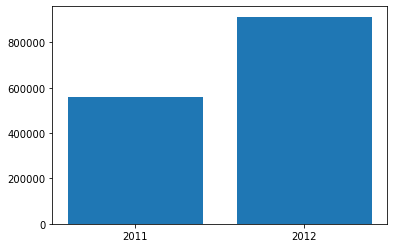

In [119]:
# Create a list for Year and Bike Count to visualise as bar chart - Understand bikes rented in each year
year = ['2011', '2012']
bike_count = [559146,912678]
plt.bar(year, bike_count)
plt.show()

In [120]:
# Visualisation - Group and Count per season 
uci_bike_rentals.groupby(['season'])[['count']].sum()

,count
season,
autumn,375998
spring,420895
summer,456228
winter,218703


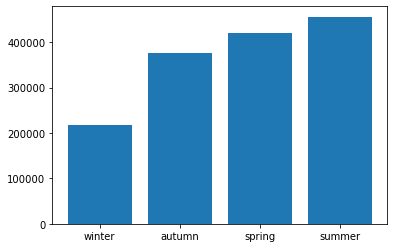

In [121]:
# Create a list for Season and Bike Count to visualise as bar chart - Understand bikes rented per season
season = ['winter', 'autumn', 'spring', 'summer']
bike_count = [218703,375998,420895,456228]
plt.bar(season, bike_count)
plt.show()